In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import sklearn as skl
import plotly as ply

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving log2.csv to log2.csv


In [ ]:
data = pd.read_csv('log2.csv')

In [ ]:
data.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,allow,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,allow,320,140,180,6,7,3,3
7,50049,443,21285,443,allow,7912,3269,4643,23,96,12,11
8,52244,58774,2211,58774,allow,70,70,0,1,5,1,0
9,50627,443,16215,443,allow,8256,1674,6582,31,75,15,16


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [ ]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


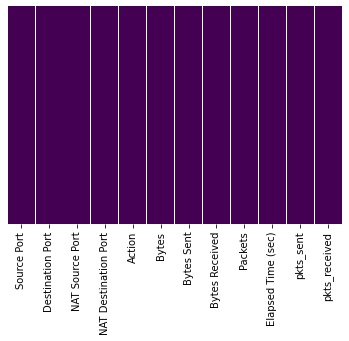

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

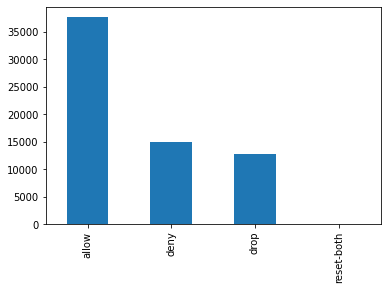

In [ ]:
data['Action'].value_counts().plot(kind='bar')
data['Action'].value_counts()

In [ ]:
#we removed reset-both from data as it only had 54 values in this big data
data = data[data.Action != 'reset-both']
data.head(232)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
227,55678,445,0,0,drop,70,70,0,1,0,1,0
228,6666,3389,0,0,deny,60,60,0,1,0,1,0
230,55677,445,0,0,drop,70,70,0,1,0,1,0
231,25533,22114,0,0,deny,62,62,0,1,0,1,0


In [ ]:
data.drop(['Bytes','Bytes Sent','Bytes Received','Packets','Elapsed Time (sec)','pkts_sent','pkts_received'],axis=1,inplace=True)

In [ ]:
data.keys()

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action'],
      dtype='object')

In [ ]:
#labeling text to numeric
from sklearn import preprocessing
from collections import defaultdict

# select text columns
cat_cols = data.select_dtypes(include='object').columns

# this is a way to apply label_encoder to all category cols at once, returning a label encoder per categorical column, in a dict d 
d = defaultdict(preprocessing.LabelEncoder)

 # transform all text columns to numbers
data[cat_cols] = data[cat_cols].apply(lambda x: d[x.name].fit_transform(x.astype(str)))


ValueError: ignored

In [ ]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action
0,57222,53,54587,53,0
1,56258,3389,56258,3389,0
2,6881,50321,43265,50321,0
3,50553,3389,50553,3389,0
4,50002,443,45848,443,0
...,...,...,...,...,...
65527,63691,80,13237,80,0
65528,50964,80,13485,80,0
65529,54871,445,0,0,2
65530,54870,445,0,0,2


In [ ]:
#now we can see that the data is oversampled so we need to do either over or under sampling.


In [ ]:
#randomundersampler
X = data.drop('Action',axis=1)
y = data['Action']

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={0:12851,1:12851,2:12851})
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
print(y_resampled)

0        0
1        0
2        0
3        0
4        0
        ..
38548    2
38549    2
38550    2
38551    2
38552    2
Name: Action, Length: 38553, dtype: int64


In [ ]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
38548    2
38549    2
38550    2
38551    2
38552    2
Name: Action, Length: 38553, dtype: int64

In [ ]:
print(X_resampled)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port
0            44011               443            64228                   443
1            61027                80            42775                    80
2            53229               443            53229                   443
3            50118               443            10177                   443
4            33932               443            50545                   443
...            ...               ...              ...                   ...
38548        55164               445                0                     0
38549        56151               445                0                     0
38550        63639               445                0                     0
38551        61293               445                0                     0
38552        56232               445                0                     0

[38553 rows x 4 columns]


In [ ]:
new = pd.concat([X_resampled,y_resampled],axis=1)
new

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action
0,44011,443,64228,443,0
1,61027,80,42775,80,0
2,53229,443,53229,443,0
3,50118,443,10177,443,0
4,33932,443,50545,443,0
...,...,...,...,...,...
38548,55164,445,0,0,2
38549,56151,445,0,0,2
38550,63639,445,0,0,2
38551,61293,445,0,0,2


In [ ]:
#pca
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_resampled)
scaled_data = scaler.transform(X_resampled)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape


(38553, 4)

In [ ]:
x_pca.shape

(38553, 2)

<Figure size 1440x1080 with 0 Axes>

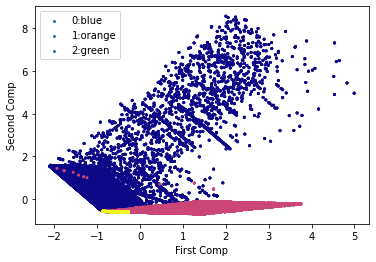

<Figure size 1440x1080 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

for color in ['0:blue', '1:orange', '2:green']:
  
  ax.scatter(x_pca[:,0],x_pca[:,1],c=new['Action'],cmap='plasma',s=4,label=color)
  plt.xlabel('First Comp')
  plt.ylabel('Second Comp')
ax.legend()
plt.figure(figsize=(20,15))
#plt.boxplot()

In [ ]:
pca.components_.shape


(2, 4)

In [ ]:
new.keys()

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action'],
      dtype='object')

In [ ]:
X_resampled.keys()

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port'],
      dtype='object')

In [ ]:
data_comp = pd.DataFrame(pca.components_,columns=X_resampled)

ValueError: ignored

In [ ]:
#decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X = X_resampled
y = y_resampled

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
predictions = dtree.predict(X_test)
predictions
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('/n')
print(classification_report(y_test,predictions))

[[3848   16    0]
 [   9 3774   10]
 [   0    8 3901]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       0.99      0.99      0.99      3793
           2       1.00      1.00      1.00      3909

    accuracy                           1.00     11566
   macro avg       1.00      1.00      1.00     11566
weighted avg       1.00      1.00      1.00     11566



In [ ]:
pred_proba = dtree.predict_proba(X_test)
pred_proba

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
roc_auc_score(y_test,pred_proba,multi_class='ovr')

0.9979099003786756

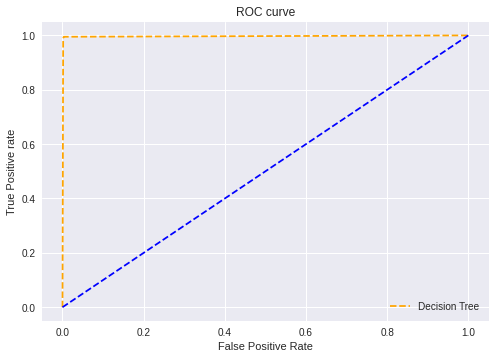

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_proba[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 2000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [ ]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('/n')
print(classification_report(y_test,rfc_pred))

[[3846   18    0]
 [   8 3774   11]
 [   0    7 3902]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       0.99      0.99      0.99      3793
           2       1.00      1.00      1.00      3909

    accuracy                           1.00     11566
   macro avg       1.00      1.00      1.00     11566
weighted avg       1.00      1.00      1.00     11566



In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train, y_train = X[11566:30842], y[11:30842]
X_valid, y_valid = X[30842:], y[30842:]
X_train_valid, y_train_valid = X[11566:32769], y[11566:32769]
X_test, y_test = X[:11566], y[:11566]

# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier(n_estimators=2000)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)

score = log_loss(y_test, clf_probs)
print(score)

ValueError: ignored

In [ ]:
#knn algo
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X = X_resampled
y = y_resampled

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
predk = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predk))
print('/n')
print(classification_report(y_test,predk))

[[3811   55    3]
 [   8 3793   25]
 [   0    0 3871]]
/n
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3869
           1       0.99      0.99      0.99      3826
           2       0.99      1.00      1.00      3871

    accuracy                           0.99     11566
   macro avg       0.99      0.99      0.99     11566
weighted avg       0.99      0.99      0.99     11566



In [ ]:
error_rate =[]

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  

Text(0, 0.5, 'Error Rate')

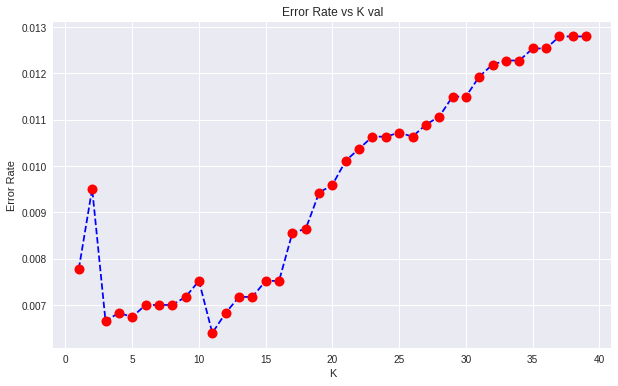

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K val')
plt.xlabel('K')
plt.ylabel('Error Rate')